# **Assignment 2: Content Analysis and Regression**

For this assignment, you need to test a hypothesis using multiple linear regression. Before doing that, you also need to use computational content analysis and NLP techniques to create new variables that you will use as a predictor in the regression model.

##**Research Background**##

According to Chatman (1980), characters are constructs within abstracted narratives, described through networks of personality traits (e.g., Sarrasine is feminine, Othello is jealous, Roland Deschain is brave). Docherty characterizes the process of depicting and interpreting characters in literature as 'characterization' (cited by Bennett and Royle, 2017). Reaske (1996) identifies several devices of characterization, including character appearance, asides and soliloquies, dialogue, hidden narration, language, and actions performed. Characterization is crucial in narrative because it allows readers to relate to characters and feel emotionally engaged in the story (Cohen, 2001). providing information on personalities and behaviors for gender representation analysis in fiction.

For this assignment, you'll work with a corpus of the genre Real Person Fiction (RPF), where characters are characterized by blending real-life traits with fans' interpretations and reimagination, reflecting societal and cultural trends.

On the online fanfiction platform AO3, fanfictions about the Korean boy band BTS represent the largest fandom, surpassing even the Marvel Universe and Harry Potter franchises. Research into the global popularity of the Korean Wave (*Hallyu*) has highlighted the concept of "manufactured versatile masculinity" exhibited by male K-pop idols, a blend of softer, more effeminate appearances or behaviors with traditional forms of hegemonic masculinity, described by scholars such as Jung (2011), Kuo et al. (2020), Kwon (2019), and Oh (2015). Oh (2015) terms this "liminal masculinity," with androgynous K-pop male idols crossing gender lines.

**Aim:**

This assignment aims to analyze the impact of soft masculinity on K-pop fanfiction's success using a corpus of 100 BTS fanfictions.

**Data:**

We will utilize a dataset from the GOLEM project, comprising 100 BTS-related fanfictions, including story ID, publication year, word count, kudos, comments, and story content in English (1,000 to 1,200 words).

**Methods:**
- operationalize the concept of 'soft masculinity' to make it measurable
- use regression analysis to test a hypothesis

In [1]:
# Load and check the dataset
import pandas as pd

df = pd.read_csv('BTS_short_100.csv', encoding="UTF-8")
df.head()

,story_id,published_year,words,kudos,comments,story_content
0,4706144,2015,1185,249.0,1.0,library snacks & 3AM promises\n\nAuthor's Note...
1,4752980,2015,1164,79.0,NaN,Worry\n\nYou stumbled through the apartment do...
2,4706144,2015,1185,249.0,1.0,library snacks & 3AM promises\n\nAuthor's Note...
3,4621698,2015,1016,105.0,4.0,Mornings\n\nThis is literally trash omg what I...
4,4752980,2015,1164,79.0,NaN,Worry\n\nYou stumbled through the apartment do...


Have you noticed something odd in the first five lines of this dataset?

There are some duplicates.

So first we need to do some data cleaning, checking how many rows are duplicated and deleting the duplicates.


In [3]:
# Get the number of unique rows
unique_story_ids = df['story_id'].nunique()

# Print the result
print(f"The number of unique 'story_id' values is: {unique_story_ids}")

The number of unique 'story_id' values is: 90


In [4]:
# Remove duplicate rows
df = df.drop_duplicates()

df.head()

,story_id,published_year,words,kudos,comments,story_content
0,4706144,2015,1185,249.0,1.0,library snacks & 3AM promises\n\nAuthor's Note...
1,4752980,2015,1164,79.0,NaN,Worry\n\nYou stumbled through the apartment do...
3,4621698,2015,1016,105.0,4.0,Mornings\n\nThis is literally trash omg what I...
5,3651108,2015,1174,339.0,6.0,Purple Gel Pens\n\nAuthor's Note:\n\nwtf is th...
7,5282729,2015,1173,17.0,NaN,"Unspoken Words\n\nYou come back into the flat,..."


In [5]:
# Let's check how many rows there are now
df.shape[0]

90

##**Research Design**##
The steps of this research involve formulating a hypothesis, selecting `kudos` as a proxy for the success of a story -- the dependent variable (Y) -- and calculating a masculinity score to be used as the independent variable (x1). We will also use additional variables that are also likely to have an effect on the success of a story: `publication_year` (x2) - because AO3 user base has grown in time and more recent stories are more likely to receive more kudos simply becasue there are more readers on the platform - and lexical richness (x3) - because it's plausible that a story with a richer vocabulary also has a better style and, therefore, it's liked more by readers.

Note that we don't have variables for `masculinity_score` and `lexical_richness` yet, so we need to calculate them from the text of the stories.

The hypothesis states:

H1: Low levels of masculinity in male characters positively affects fanfiction success when controlling for publication year and lexical richness.

**H0: What is the null hypothesis?**

# H0 (answer in words):
Levels of masculinity in male characters does not have any significant effect on fanfiction success when controlling for publication year and lexical richness.

##**Compute Masculinity Score**##

To calculate a sterotypical masculinity score, we can refer to older theories of perceived gender identity that probably define gender roles in a stereotypical way. an example of this is the Bem Sex-Role Inventory (BSRI) by Dr. Sandra Lipzits Bem (1974), which classifies personality traits into masculine, feminine, and androgynous.

Bem divides personal traits into 60 traits: 20 masculine traits, 20 feminine traits and 20 neutral traits (see figure below).


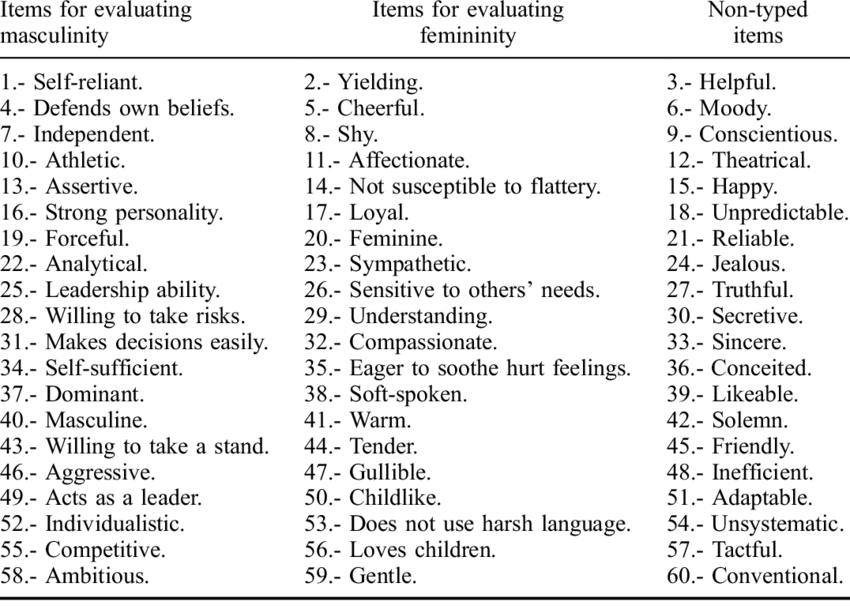

The above list shows that, despite recent discussions about masculinity, femininity, and gender roles have become more diversified, traditional definitions such as those provided by the Bem Sex-Role Inventory (BSRI) can be useful to detect gender stereotypes. Within the definitions of masculinity and femininity outlined by the BSRI, we observe a clear power imbalance: masculinity is associated with dominance (e.g., assertive, strong personality, forceful, leadership ability, dominant, aggressive, ambitious), while femininity leans towards submissiveness (e.g., yielding, understanding, tender). Therefore, we can consider employing the power-agent frames designed by Sap et al. to compute a power score for the male characters in the fanfiction stories. Lower masculinity scores can be plausibly associated with a representation of 'soft masculinity' in relation to a character.

###**Riveter**###

In the W5 lab, we have already gained preliminary experience with the Riveter pipeline.

In this section, we will use utilize the Riveter pipeline with Sap's power-agent frames to calculate the `masculinity_score` for identifiable agents in the text. Since we are interested only in the masculinity of male characters, we will use regular expressions to identify male pronouns (he, him, himself) and calculate their corresponding `masculinity_score`. This score will be added to the df as a new column.


In [ ]:
# Set up everything you need to use Riveter, following the notebook we used in W5 lab
# No need to put the code here, as long as it's working
# We assume that you have installed all the required packages, either locally or on Colab

Now we have prepared all the dependencies needed.

In [6]:
from collections import defaultdict
import os
import pandas as pd
import random
from riveter import Riveter # if the notebook is not in the /riveter folder, this will throw an error

import seaborn as sns
import matplotlib.pyplot as plt

**Prepare the corpus**:

First, we can try to initialize two lists to store `story_content` and `story_id`, but this will casue the problem below:

`Token indices sequence length is longer than the specified maximum sequence length for this model (574 > 512).`

This is a limit of the language model (BERT) used by Riveter. We need to split the file into smaller chunks in order for it to be processed correctly. The example in the original Riveter notebook where they load *Pride and Prejudice* shows how we can do this. The code is also provided here below.




In [7]:
def split_text_into_segments(text, max_length=512):
    """
    Segment the text so that each segment contains a maximum of max length tokens.
    """
    segments = []
    current_segment = []
    for word in text.split():
        if len(current_segment) + len(word.split()) <= max_length:
            current_segment.append(word)
        else:
            segments.append(' '.join(current_segment))
            current_segment = [word]
    if current_segment:
        segments.append(' '.join(current_segment))
    return segments

Let's first initialize Riveter with the lexicon that we are going to use:

In [10]:
riveter = Riveter()

In [11]:
# Q0 (code): Load lexicon 'power' and create an empty dictionary called 'scores_dict'
# Empty dictionary called 'scores_dict' below
scores_dict={}
# Load lexicon 'power' using the load_sap_lexicon method
riveter.load_sap_lexicon('power')

Now we can apply the splitting function we defined above and then use Riveter on our corpus. To do this, we need to create a loop that iterates through all the rows in the dataframe and compute scores for each story.

**Q1. Train Riveter to assign scores to text based on male pronouns**

In [15]:
from tqdm import tqdm # used to display a progress bar when executing code

for index, row in tqdm(df.iterrows(), total=df.shape[0], desc="Processing stories"):
    story_id = row['story_id']
    story_content = row['story_content']

    # apply the splitting function:
    segments = split_text_into_segments(story_content)
    text_ids = [f"{story_id}_{i}" for i in range(len(segments))]

    # Q1 (code): train riveter specifying 'persona_patterns_dict= ' to assign scores only based on male pronouns
    # write code below:
    riveter.train(segments,
                  text_ids,
                  num_bootstraps=20,
                  persona_patterns_dict={'masculine':r'he$|^him$|^himself$',})

    # store the computed scores in a dictionary
    persona_score_dict = riveter.get_score_totals()
    masculine_score = persona_score_dict.get('masculine', 0)

    # get a feedback about the computed scores while the code is running
    print(f"Story ID: {story_id}, Masculine Power Score: {masculine_score}")

    # store the score of each story in the same dictionary so that we can then add it to the dataframe
    scores_dict[story_id] = masculine_score

# add the dictionary of scores to the dataframe
df['masculine_power_score'] = df['story_id'].map(scores_dict)

Processing stories:   1%|          | 1/90 [00:19<28:29, 19.21s/it]

2024-03-14 23:33:17 Complete!
Story ID: 4706144, Masculine Power Score: 0.1215970744231614



Processing stories:   2%|▏         | 2/90 [00:37<26:58, 18.39s/it]

2024-03-14 23:33:35 Complete!
Story ID: 4752980, Masculine Power Score: 0.2431736054773089



Processing stories:   3%|▎         | 3/90 [00:51<24:16, 16.74s/it]

2024-03-14 23:33:50 Complete!
Story ID: 4621698, Masculine Power Score: 0.6374603174603175



Processing stories:   4%|▍         | 4/90 [01:07<23:10, 16.17s/it]

2024-03-14 23:34:05 Complete!
Story ID: 3651108, Masculine Power Score: 0.1295041188535434



Processing stories:   6%|▌         | 5/90 [01:22<22:16, 15.73s/it]

2024-03-14 23:34:20 Complete!
Story ID: 5282729, Masculine Power Score: 0.2070892381214962



Processing stories:   7%|▋         | 6/90 [01:37<21:41, 15.49s/it]

2024-03-14 23:34:35 Complete!
Story ID: 5533886, Masculine Power Score: 0.0006547619047619048



Processing stories:   8%|▊         | 7/90 [01:51<21:06, 15.25s/it]

2024-03-14 23:34:50 Complete!
Story ID: 4547622, Masculine Power Score: 0.057756650479263705



Processing stories:   9%|▉         | 8/90 [02:04<19:51, 14.53s/it]

2024-03-14 23:35:03 Complete!
Story ID: 16177508, Masculine Power Score: 0.16582293940394557



Processing stories:  10%|█         | 9/90 [02:19<19:46, 14.65s/it]

2024-03-14 23:35:18 Complete!
Story ID: 15745185, Masculine Power Score: -0.10350557029341001



 33%|███▎      | 1/3 [00:07<00:14,  7.38s/it]Token indices sequence length is longer than the specified maximum sequence length for this model (575 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (575 > 512). Running this sequence through the model will result in indexing errors

Processing stories:  11%|█         | 10/90 [02:35<20:04, 15.06s/it]

2024-03-14 23:35:34 Complete!
Story ID: 15654528, Masculine Power Score: 0.18542846572481658



Processing stories:  12%|█▏        | 11/90 [02:50<19:51, 15.08s/it]

2024-03-14 23:35:49 Complete!
Story ID: 7448155, Masculine Power Score: 0.324954583629369



Processing stories:  13%|█▎        | 12/90 [03:07<20:18, 15.62s/it]

2024-03-14 23:36:06 Complete!
Story ID: 4983847, Masculine Power Score: 0.09671497657094798



Processing stories:  14%|█▍        | 13/90 [03:24<20:40, 16.12s/it]

2024-03-14 23:36:23 Complete!
Story ID: 3313118, Masculine Power Score: -0.21566385405836974



Processing stories:  16%|█▌        | 14/90 [03:40<20:10, 15.93s/it]

2024-03-14 23:36:38 Complete!
Story ID: 3290390, Masculine Power Score: -0.11555500350713117



Processing stories:  17%|█▋        | 15/90 [03:55<19:37, 15.70s/it]

2024-03-14 23:36:54 Complete!
Story ID: 36435301, Masculine Power Score: 0.05139237836606257



Processing stories:  18%|█▊        | 16/90 [04:09<18:43, 15.18s/it]

2024-03-14 23:37:08 Complete!
Story ID: 36575491, Masculine Power Score: 0.264618632141852



Processing stories:  19%|█▉        | 17/90 [04:22<17:45, 14.60s/it]

2024-03-14 23:37:21 Complete!
Story ID: 35225224, Masculine Power Score: 0.23863806832956444



Processing stories:  20%|██        | 18/90 [04:35<16:54, 14.08s/it]

2024-03-14 23:37:34 Complete!
Story ID: 4594527, Masculine Power Score: 0.21864621489621489



Processing stories:  21%|██        | 19/90 [04:47<15:52, 13.41s/it]

2024-03-14 23:37:45 Complete!
Story ID: 5485625, Masculine Power Score: 0.10520858451892934



Processing stories:  22%|██▏       | 20/90 [05:01<15:39, 13.42s/it]

2024-03-14 23:37:59 Complete!
Story ID: 36408319, Masculine Power Score: 0.12067847637670026



Processing stories:  23%|██▎       | 21/90 [05:16<16:07, 14.02s/it]

2024-03-14 23:38:14 Complete!
Story ID: 35762659, Masculine Power Score: 0.20270298332998826



Processing stories:  24%|██▍       | 22/90 [05:31<16:13, 14.32s/it]

2024-03-14 23:38:29 Complete!
Story ID: 35603194, Masculine Power Score: 0.3639961973900268



Processing stories:  26%|██▌       | 23/90 [05:45<15:59, 14.31s/it]

2024-03-14 23:38:44 Complete!
Story ID: 35344306, Masculine Power Score: 0.12250035449246185



Processing stories:  27%|██▋       | 24/90 [05:58<15:05, 13.72s/it]

2024-03-14 23:38:56 Complete!
Story ID: 36695155, Masculine Power Score: 0.014621848739495794



Processing stories:  28%|██▊       | 25/90 [06:12<15:01, 13.87s/it]

2024-03-14 23:39:10 Complete!
Story ID: 36064474, Masculine Power Score: 0.13008020421749772



Processing stories:  29%|██▉       | 26/90 [06:25<14:40, 13.77s/it]

2024-03-14 23:39:24 Complete!
Story ID: 36024820, Masculine Power Score: 0.1546010639664216



Processing stories:  30%|███       | 27/90 [06:41<15:05, 14.37s/it]

2024-03-14 23:39:40 Complete!
Story ID: 35182330, Masculine Power Score: 0.06222055761087068



Processing stories:  31%|███       | 28/90 [06:55<14:45, 14.28s/it]

2024-03-14 23:39:54 Complete!
Story ID: 36567496, Masculine Power Score: 0.23057540591672449



Processing stories:  32%|███▏      | 29/90 [07:09<14:24, 14.17s/it]

2024-03-14 23:40:08 Complete!
Story ID: 35560330, Masculine Power Score: 0.13639983652050108



Processing stories:  33%|███▎      | 30/90 [07:24<14:27, 14.45s/it]

2024-03-14 23:40:23 Complete!
Story ID: 35877496, Masculine Power Score: 0.13658353708769463



Processing stories:  34%|███▍      | 31/90 [07:38<13:59, 14.22s/it]

2024-03-14 23:40:36 Complete!
Story ID: 35957410, Masculine Power Score: 0.2917063946496959



Processing stories:  36%|███▌      | 32/90 [07:51<13:27, 13.92s/it]

2024-03-14 23:40:50 Complete!
Story ID: 30947654, Masculine Power Score: 0.005783078385619223



Processing stories:  37%|███▋      | 33/90 [08:05<13:12, 13.90s/it]

2024-03-14 23:41:03 Complete!
Story ID: 36332707, Masculine Power Score: -0.10580859169293577



Processing stories:  38%|███▊      | 34/90 [08:20<13:11, 14.13s/it]

2024-03-14 23:41:18 Complete!
Story ID: 35967940, Masculine Power Score: 0.20953585290345877



Processing stories:  39%|███▉      | 35/90 [08:34<12:57, 14.13s/it]

2024-03-14 23:41:32 Complete!
Story ID: 35001073, Masculine Power Score: 0.21570263070263068



Processing stories:  40%|████      | 36/90 [08:48<12:37, 14.02s/it]

2024-03-14 23:41:46 Complete!
Story ID: 35138911, Masculine Power Score: 0.13103583238798394



Processing stories:  41%|████      | 37/90 [09:00<11:53, 13.46s/it]

2024-03-14 23:41:58 Complete!
Story ID: 35280397, Masculine Power Score: 0.18119577352472085



Processing stories:  42%|████▏     | 38/90 [09:14<11:56, 13.78s/it]

2024-03-14 23:42:13 Complete!
Story ID: 36049939, Masculine Power Score: 0.2939293853230228



Processing stories:  43%|████▎     | 39/90 [09:29<12:02, 14.17s/it]

2024-03-14 23:42:28 Complete!
Story ID: 34995673, Masculine Power Score: 0.16148453741212412



Processing stories:  44%|████▍     | 40/90 [09:45<12:12, 14.65s/it]

2024-03-14 23:42:43 Complete!
Story ID: 33477346, Masculine Power Score: 0.43397367338543813



Processing stories:  46%|████▌     | 41/90 [09:58<11:31, 14.11s/it]

2024-03-14 23:42:56 Complete!
Story ID: 36840832, Masculine Power Score: -0.19966772993088783



Processing stories:  47%|████▋     | 42/90 [10:11<10:56, 13.67s/it]

2024-03-14 23:43:09 Complete!
Story ID: 30896276, Masculine Power Score: 0.14500000000000002



Processing stories:  48%|████▊     | 43/90 [10:22<10:08, 12.94s/it]

2024-03-14 23:43:20 Complete!
Story ID: 37363471, Masculine Power Score: 0.27741325206699174



Processing stories:  49%|████▉     | 44/90 [10:35<09:53, 12.91s/it]

2024-03-14 23:43:33 Complete!
Story ID: 36984901, Masculine Power Score: 0.07501124606387762



Processing stories:  50%|█████     | 45/90 [10:49<09:55, 13.22s/it]

2024-03-14 23:43:47 Complete!
Story ID: 33353644, Masculine Power Score: -0.038528131136344235



Processing stories:  51%|█████     | 46/90 [11:02<09:43, 13.26s/it]

2024-03-14 23:44:00 Complete!
Story ID: 37002835, Masculine Power Score: -0.141486568986569



Processing stories:  52%|█████▏    | 47/90 [11:15<09:26, 13.17s/it]

2024-03-14 23:44:13 Complete!
Story ID: 5630824, Masculine Power Score: 0.3139427516158818



Processing stories:  53%|█████▎    | 48/90 [11:28<09:07, 13.04s/it]

2024-03-14 23:44:26 Complete!
Story ID: 10053617, Masculine Power Score: 0.26803019622920937



Processing stories:  54%|█████▍    | 49/90 [11:40<08:52, 12.99s/it]

2024-03-14 23:44:39 Complete!
Story ID: 1572659, Masculine Power Score: 0.2581874742904155



Processing stories:  56%|█████▌    | 50/90 [11:55<09:01, 13.55s/it]

2024-03-14 23:44:54 Complete!
Story ID: 7450573, Masculine Power Score: 0.2535110400435478



Processing stories:  57%|█████▋    | 51/90 [12:09<08:46, 13.50s/it]

2024-03-14 23:45:07 Complete!
Story ID: 6918676, Masculine Power Score: 0.06502474346601689



Processing stories:  58%|█████▊    | 52/90 [12:25<09:00, 14.23s/it]

2024-03-14 23:45:23 Complete!
Story ID: 6075402, Masculine Power Score: 0.3683058242971151



Processing stories:  59%|█████▉    | 53/90 [12:39<08:44, 14.17s/it]

2024-03-14 23:45:37 Complete!
Story ID: 11101779, Masculine Power Score: 0.3442765567765568



Processing stories:  60%|██████    | 54/90 [12:54<08:37, 14.38s/it]

2024-03-14 23:45:52 Complete!
Story ID: 11321331, Masculine Power Score: 0.11775110058693875



Processing stories:  61%|██████    | 55/90 [13:06<08:08, 13.94s/it]

2024-03-14 23:46:05 Complete!
Story ID: 12284853, Masculine Power Score: 0.1278474901254204



Processing stories:  62%|██████▏   | 56/90 [13:19<07:44, 13.66s/it]

2024-03-14 23:46:18 Complete!
Story ID: 12282003, Masculine Power Score: 0.12939907837297715



Processing stories:  63%|██████▎   | 57/90 [13:31<07:14, 13.16s/it]

2024-03-14 23:46:30 Complete!
Story ID: 7613533, Masculine Power Score: 0.3018149900613603



Processing stories:  64%|██████▍   | 58/90 [13:44<06:59, 13.09s/it]

2024-03-14 23:46:43 Complete!
Story ID: 4228053, Masculine Power Score: 0.21443897832244097



Processing stories:  66%|██████▌   | 59/90 [13:59<06:56, 13.43s/it]

2024-03-14 23:46:57 Complete!
Story ID: 12127317, Masculine Power Score: 0.14397516408090066



Processing stories:  67%|██████▋   | 60/90 [14:12<06:46, 13.55s/it]

2024-03-14 23:47:11 Complete!
Story ID: 12010134, Masculine Power Score: 0.2496827980203939



Processing stories:  68%|██████▊   | 61/90 [14:29<07:02, 14.56s/it]

2024-03-14 23:47:28 Complete!
Story ID: 11510919, Masculine Power Score: 0.43699620978907905



Processing stories:  69%|██████▉   | 62/90 [14:45<06:56, 14.87s/it]

2024-03-14 23:47:43 Complete!
Story ID: 8145802, Masculine Power Score: 0.22902685646568224



Processing stories:  70%|███████   | 63/90 [14:59<06:38, 14.76s/it]

2024-03-14 23:47:58 Complete!
Story ID: 6637942, Masculine Power Score: -0.14392124454694405



Processing stories:  71%|███████   | 64/90 [15:13<06:14, 14.39s/it]

2024-03-14 23:48:11 Complete!
Story ID: 7427905, Masculine Power Score: -0.023385074677644335



Processing stories:  72%|███████▏  | 65/90 [15:25<05:43, 13.74s/it]

2024-03-14 23:48:24 Complete!
Story ID: 3893857, Masculine Power Score: 0.1438129321991438



Processing stories:  73%|███████▎  | 66/90 [15:38<05:24, 13.50s/it]

2024-03-14 23:48:37 Complete!
Story ID: 33040258, Masculine Power Score: 0.2095238095238095



Processing stories:  74%|███████▍  | 67/90 [15:52<05:10, 13.49s/it]

2024-03-14 23:48:50 Complete!
Story ID: 33858850, Masculine Power Score: -0.10533299689646439



Processing stories:  76%|███████▌  | 68/90 [16:07<05:07, 13.96s/it]

2024-03-14 23:49:05 Complete!
Story ID: 2775776, Masculine Power Score: 0.24329004329004328



Processing stories:  77%|███████▋  | 69/90 [16:21<04:55, 14.06s/it]

2024-03-14 23:49:19 Complete!
Story ID: 3197963, Masculine Power Score: 0.2927564102564103



Processing stories:  78%|███████▊  | 70/90 [16:35<04:40, 14.04s/it]

2024-03-14 23:49:33 Complete!
Story ID: 12395199, Masculine Power Score: 0.15704056011862372



Processing stories:  79%|███████▉  | 71/90 [16:47<04:15, 13.44s/it]

2024-03-14 23:49:45 Complete!
Story ID: 10934010, Masculine Power Score: 0.2890983851338525



Processing stories:  80%|████████  | 72/90 [17:00<03:57, 13.20s/it]

2024-03-14 23:49:58 Complete!
Story ID: 12301116, Masculine Power Score: -0.05635041009749331



Processing stories:  81%|████████  | 73/90 [17:14<03:48, 13.46s/it]

2024-03-14 23:50:12 Complete!
Story ID: 12706317, Masculine Power Score: -0.10132596343873519



Processing stories:  82%|████████▏ | 74/90 [17:28<03:38, 13.68s/it]

2024-03-14 23:50:26 Complete!
Story ID: 11499468, Masculine Power Score: 0.12957749335179697



Processing stories:  83%|████████▎ | 75/90 [17:40<03:18, 13.25s/it]

2024-03-14 23:50:39 Complete!
Story ID: 12184146, Masculine Power Score: 0.35647388632872506



Processing stories:  84%|████████▍ | 76/90 [17:53<03:03, 13.13s/it]

2024-03-14 23:50:51 Complete!
Story ID: 12201333, Masculine Power Score: 0.10774841972598057



Processing stories:  86%|████████▌ | 77/90 [18:07<02:52, 13.25s/it]

2024-03-14 23:51:05 Complete!
Story ID: 11496030, Masculine Power Score: 0.047429743472245475



Processing stories:  87%|████████▋ | 78/90 [18:21<02:42, 13.54s/it]

2024-03-14 23:51:19 Complete!
Story ID: 11510277, Masculine Power Score: 0.14293491025317545



Processing stories:  88%|████████▊ | 79/90 [18:35<02:31, 13.80s/it]

2024-03-14 23:51:34 Complete!
Story ID: 10772274, Masculine Power Score: 0.42266228718853804



Processing stories:  89%|████████▉ | 80/90 [18:48<02:16, 13.61s/it]

2024-03-14 23:51:47 Complete!
Story ID: 12646050, Masculine Power Score: 0.05148823763955342



Processing stories:  90%|█████████ | 81/90 [19:01<02:00, 13.35s/it]

2024-03-14 23:51:59 Complete!
Story ID: 11161479, Masculine Power Score: 0.07132327023830715



Processing stories:  91%|█████████ | 82/90 [19:14<01:46, 13.29s/it]

2024-03-14 23:52:13 Complete!
Story ID: 12069936, Masculine Power Score: 0.08415195808052951



Processing stories:  92%|█████████▏| 83/90 [19:29<01:35, 13.65s/it]

2024-03-14 23:52:27 Complete!
Story ID: 12285972, Masculine Power Score: 0.40082421109743727



Processing stories:  93%|█████████▎| 84/90 [19:41<01:19, 13.23s/it]

2024-03-14 23:52:39 Complete!
Story ID: 12372702, Masculine Power Score: 0.041992240215924424



Processing stories:  94%|█████████▍| 85/90 [19:55<01:07, 13.42s/it]

2024-03-14 23:52:53 Complete!
Story ID: 12610496, Masculine Power Score: 0.0832436130997505



Processing stories:  96%|█████████▌| 86/90 [20:09<00:54, 13.74s/it]

2024-03-14 23:53:08 Complete!
Story ID: 10970472, Masculine Power Score: 0.13751083340447212



Processing stories:  97%|█████████▋| 87/90 [20:22<00:40, 13.46s/it]

2024-03-14 23:53:21 Complete!
Story ID: 12084552, Masculine Power Score: 0.3197408060288947



Processing stories:  98%|█████████▊| 88/90 [20:37<00:27, 13.85s/it]

2024-03-14 23:53:35 Complete!
Story ID: 12727119, Masculine Power Score: -0.0051543868912224495



Processing stories:  99%|█████████▉| 89/90 [20:51<00:13, 13.98s/it]

2024-03-14 23:53:50 Complete!
Story ID: 11962824, Masculine Power Score: 0.0



Processing stories: 100%|██████████| 90/90 [21:05<00:00, 14.06s/it]

2024-03-14 23:54:03 Complete!
Story ID: 10859508, Masculine Power Score: 0.20742282193352324


**Q2. Print a sample of the dataframe to check whether the `masculine_power_score` has been added correctly**

In [17]:
# Q2 (code)
df.head()

,story_id,published_year,words,kudos,comments,story_content,masculine_power_score
0,4706144,2015,1185,249.0,1.0,library snacks & 3AM promises\n\nAuthor's Note...,0.121597
1,4752980,2015,1164,79.0,NaN,Worry\n\nYou stumbled through the apartment do...,0.243174
3,4621698,2015,1016,105.0,4.0,Mornings\n\nThis is literally trash omg what I...,0.637460
5,3651108,2015,1174,339.0,6.0,Purple Gel Pens\n\nAuthor's Note:\n\nwtf is th...,0.129504
7,5282729,2015,1173,17.0,NaN,"Unspoken Words\n\nYou come back into the flat,...",0.207089


# If you use google colab, it's better to save this result locally in case the connection breaks and then you lose the result.
df.to_csv('/content/df.csv', index=False) 
# I'm using Jupyter Notebooks.

##**Compute Lexical Richness Score**##

'Lexical richness' refers to the range and variety of vocabulary deployed in a text by a speaker/writer. 'Lexical richness' is a term used interchangeably with 'lexical diversity', 'lexical variation', 'lexical density', and 'vocabulary richnes', and it's measured by a wide variety of indices. Uses include (but are not limited to) measuring writing quality, vocabulary knowledge, speaker competence, and socioeconomic status.


The type-token ratio (TTR) is a simple measure of lexical diversity within a text. It is calculated by dividing the number of unique words (types) by the total number of words (tokens) in the given text. A higher TTR indicates a greater variety of vocabulary, suggesting richer lexical content. Conversely, a lower TTR suggests more repetitive use of vocabulary. TTR is often used to assess the lexical complexity of written or spoken material.

Here we use the package `lexicalrichness` (https://pypi.org/project/lexicalrichness/) to compute type-token ratio (TTR) for each story as a control on their language quality.

In [18]:
!pip install lexicalrichness

     ---------------------------------------- 0.0/97.8 kB ? eta -:--:--
     ---------------------------------------- 97.8/97.8 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Obtaining dependency information for textblob>=0.15.3 from https://files.pythonhosted.org/packages/02/07/5fd2945356dd839974d3a25de8a142dc37293c21315729a41e775b5f3569/textblob-0.18.0.post0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   ----------- ---------------------------- 174.1/626.3 kB 5.3 MB/s eta 0:00:01
   ------------------------- -------------- 399.4/626.3 kB 5.0 MB/s eta 0:00:01
   ----------------------------------- ---- 563.2/626.3 kB 4.4 MB/s eta 0:00:01
   ---------------------------------------- 626.3/626.3 kB 4.4 MB/s eta 0:00:00
  Created wheel for lexicalrichness: filename=lexicalrichness-0.5.1-py3-none-any.whl size=15484 sha256=bf77d908df51f028c24e10c2996b217c6a6c

In [19]:
from lexicalrichness import LexicalRichness

# Define a function that calculates the lexical richness of the text
def calculate_lexical_richness(text):
    # Create a LexicalRichness object for the text
    lex = LexicalRichness(text)
    # Compute type-token ratio (TTR)
    return lex.ttr  # Returns the type-token ratio

# Apply the function to the 'story content' column in the DataFrame
df['lexical_richness'] = df['story_content'].apply(calculate_lexical_richness)

# Display the DataFrame with the new 'lexical_richness' column
df.head()

,story_id,published_year,words,kudos,comments,story_content,masculine_power_score,lexical_richness
0,4706144,2015,1185,249.0,1.0,library snacks & 3AM promises\n\nAuthor's Note...,0.121597,0.428571
1,4752980,2015,1164,79.0,NaN,Worry\n\nYou stumbled through the apartment do...,0.243174,0.400665
3,4621698,2015,1016,105.0,4.0,Mornings\n\nThis is literally trash omg what I...,0.637460,0.428986
5,3651108,2015,1174,339.0,6.0,Purple Gel Pens\n\nAuthor's Note:\n\nwtf is th...,0.129504,0.412295
7,5282729,2015,1173,17.0,NaN,"Unspoken Words\n\nYou come back into the flat,...",0.207089,0.376110


Now that we have both the two new variables added to the dataframe, we have all we need to test our hypothesis with linear regression.

##**Regressions**##


**Methodology**

- Multiple Linear Regression: Perform a regression analysis with `kudos` as the dependent variable and `masculine_power_score`, `published_year`, and `words` as independent variables.
- Residual Analysis: Conduct normality and homoscedasticity tests on the residuals to validate the assumptions of linear regression.
- Model Evaluation: Assess the model using adjusted R-squared, F-test, and t-tests for individual coefficients.
- Multicollinearity Check: Calculate the Variance Inflation Factor (VIF) for the independent variables to detect possible multicollinearity.

**Q3. Check the data distribution and handle missing values**


array([[<Axes: title={'center': 'kudos'}>,
        <Axes: title={'center': 'masculine_power_score'}>],
       [<Axes: title={'center': 'published_year'}>,
        <Axes: title={'center': 'words'}>]], dtype=object)

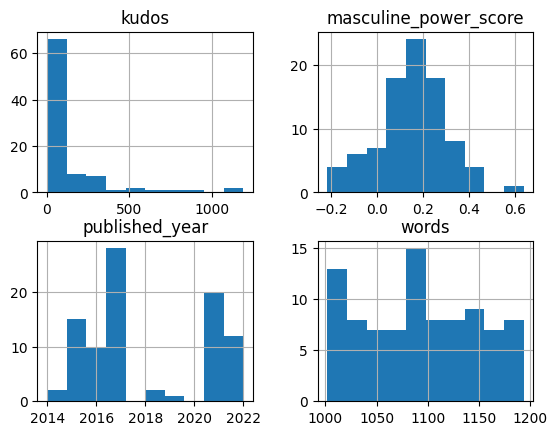

In [22]:
# Q3a (code): Check data distribution
df[['kudos','masculine_power_score', 'published_year', 'words']].hist()

I distributed data above in histograms per the columns mentioned above.

In [27]:
descriptive_stats = df[['words', 'kudos', 'masculine_power_score', 'lexical_richness']].describe()
print(descriptive_stats)

             words        kudos  masculine_power_score  lexical_richness
count    90.000000    89.000000              90.000000         90.000000
mean   1094.344444   135.393258               0.150577          0.405027
std      55.327048   229.972311               0.154283          0.037109
min    1002.000000     1.000000              -0.215664          0.264443
25%    1042.250000    20.000000               0.062922          0.384458
50%    1095.000000    54.000000               0.143374          0.410169
75%    1141.750000   122.000000               0.248085          0.428415
max    1194.000000  1190.000000               0.637460          0.491349


I isolated only the relevant numerical columns to display their descriptive statistics above.

In [28]:
# Q3c (code): Check for any missing values
missing_values = df.isnull().sum()
missing_values

story_id                  0
published_year            0
words                     0
kudos                     1
comments                 25
story_content             0
masculine_power_score     0
lexical_richness          0
dtype: int64

There is 1 missing value in 'kudos' and 25 missing values in 'comments'.

In [30]:
# Q3d (code): replace all the NA values with zeros and check again Q3c
df.fillna(0, inplace=True)

replaced_values = df.isnull().sum()
replaced_values

story_id                 0
published_year           0
words                    0
kudos                    0
comments                 0
story_content            0
masculine_power_score    0
lexical_richness         0
dtype: int64

Above, I used the .fillna method to fill in missing NaN values, and proceeded to check by creating a variable 'replaced_values' to display the results of the .sum of the remaining missing values that are .isnull. There are none, which means the method worked correctly.

It's always important to visualize the data to inspect the distributions of values for the variables your interested in (do you remember the dinosaur data shown in class?).

**Q4. Create a scatterplot with `masculine_power_score` and `kudos`**

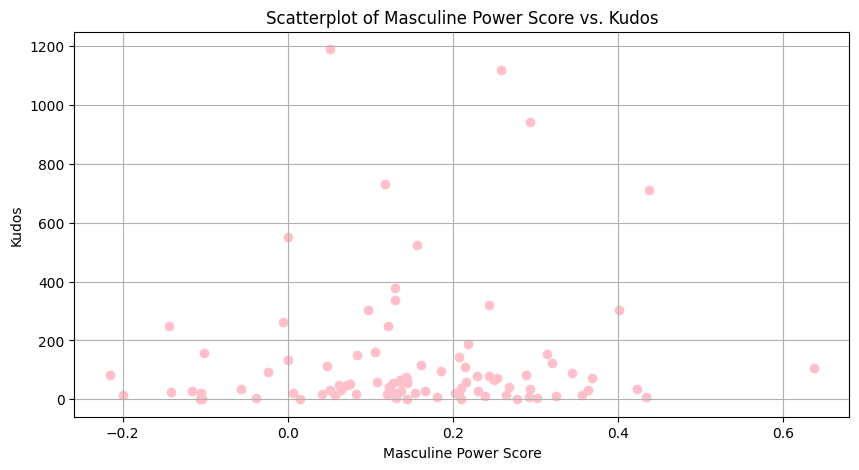

In [31]:
# Q4 (code): Create a scatterplot with masculine_power_score and kudos
plt.figure(figsize=(10, 5))
plt.scatter(df['masculine_power_score'], df['kudos'], color='pink')
plt.title('Scatterplot of Masculine Power Score vs. Kudos')
plt.xlabel('Masculine Power Score')
plt.ylabel('Kudos')
plt.grid(True)
plt.show()

To create a scatterplot, I set the figsize with parameters of 10 and 5, specified the variables and set a color, and labeled the plot and its axes.

**Q5. Multiple Regression and Analysis**

In [33]:
# Q5 (code): Do OLS Multiple Regression and print the regression result summary
import statsmodels.api as sm
x = df[['masculine_power_score', 'published_year', 'words']]
y = df['kudos']
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  kudos   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     5.581
Date:                Fri, 15 Mar 2024   Prob (F-statistic):            0.00152
Time:                        00:50:27   Log-Likelihood:                -608.28
No. Observations:                  90   AIC:                             1225.
Df Residuals:                      86   BIC:                             1235.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  6.978e+

**Q6. Interpret the results of the regression analysis**

### Q6a (words): Interpret the R-squared and Adj. R-squared

The R-Squared result is 0.163, meaning that the independent variables I am measuring for ('words', 'masculine_power_score', and 'published_year') account for around 16.3% of variability within the dependent variable, 'kudos'. The Adj. R-squared, which adjusts the score based on the number of meaningless variables included, results in 0.134 which means that the independent variables mentioned previously account for 13.4% of the variability in the dependent variable, kudos.

The scores are not extremely high, but there is an apparent correlation between the dependent and independent variable(s).

### Q6b (words): Interpret F-test result

The F-test's p-value is 0.00158 which is less than 0.05 and indicates a strong result in support of H1 and against the null hypothesis, meaning that the independent variabes words, masculine_power_score, and published_year have an effect of significance on kudos.

### Q6c (words): Interpret coefficients and t-test result

The coefficent of masculine_power_score is 48.3720. This means that kudos is expected to increase by this much for every full point that masculine_power_score increases by. The p-value is more than 0.05 and is not evidence for or against the null hypothesis, rather that there is nothing statistically significant here to suggest that the null hypthesis is supported.

The coefficent of published_year is -34.3402 and similarly to the last result, means that for every additional publication year to the total results in -34.3402 to the kudos value. The p-value is 0, less than 0.5, and rejects the null hypothesis because there is evidence to suggest that publication year has a significant or consistent effect on kudos.

The coefficient of words is -0.3177 and suggests that for each additional word in a story, the kudos will decrease by 0.3177. The p-value is 0.440 and is again not below 0.05 and fails to provide any evidence against the null hypothesis.

The t-test results 0.327 for masculine_power_score, -3.939 for published_year, and -0.776 for words is easier to interpret and consistent with the previously mentioned conclusions. The higher a value (negative or positive) indicates statistical significance.

### -------------------------------------------------------------------------------------------------------------------------

Based on the OLS regression results provided, here is an example analysis:

The model's R-squared value of 0.162 indicates that approximately 16.2% of the variability in the kudos can be explained by the model. While this suggests that the model explains a portion of the variability, there remains a significant amount unaccounted for, which might be explained by factors not included in the model.

The adjusted R-squared value of 0.133 takes into account the number of predictors in the model and the number of observations, showing a slight decrease from the R-squared value, which is normal as it adjusts for the number of terms in the model.

Looking at the coefficients:

const (6.995e+04): The constant term is significantly different from zero, which may represent the base number of kudos when all other variables are held at zero.
masculine_power_score (59.7927): This variable is not statistically significant (p-value 0.668) with a wide confidence interval, suggesting that the masculine power score does not significantly impact the number of kudos in the given dataset.
lexical_richness (390.3633): Similar to the masculine power score, lexical richness does not appear to significantly affect the number of kudos (p-value 0.524).
published_year (-34.6801): This is the only variable with a statistically significant coefficient (p-value < 0.001), indicating that more recent stories tend to have fewer kudos.
The large F-statistic (5.561) and its associated low probability (0.00155) suggest that the overall model is statistically significant compared to a model without any predictors.

**Q7: Residual Analysis**

Normality Test, Homoscedasticity Test

In [37]:
# Q7a (code): Calculate residuals and do a Shapiro-Wilk Test
residuals = model.resid

# Shapiro-Wilk
from scipy.stats import shapiro
shapiro_test = shapiro(residuals)
print(f"Shapiro-Wilk Test Statistic: {shapiro_test[0]}, p-value: {shapiro_test[1]}")

Shapiro-Wilk Test Statistic: 0.6950651407241821, p-value: 2.2316907436620292e-12


### Q7b (words): Write your analysis for the Normality Test there:

The first value, the Shapiro-Wilk test statistic value, is significantly far from a value of 1. This indicates that the values are not normally distributed and serves as evidence against the null hypothesis. The p-value serves as further, strong evidence against the null hypothesis, as it is very significantly smaller than 0.05.

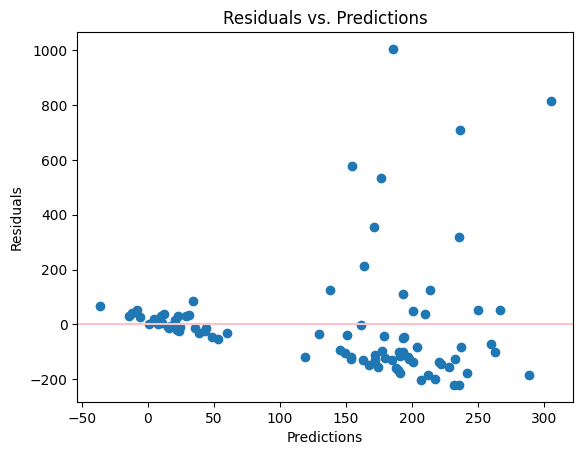

In [51]:
# Q7c (code): Homoscedasticity Test (plot residuals vs. predictions)
# Already have residuals, now need to calulcate predictions
import numpy as np
X = df[['masculine_power_score', 'published_year', 'words']]
y = df['kudos']
X = np.column_stack((np.ones(len(X)), X))
coefficients = np.linalg.inv(X.T @ X) @ X.T @ y
predictions = X @ coefficients

# Plot
plt.scatter(predictions, residuals)
plt.xlabel("Predictions")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predictions")
plt.axhline(y=0, color='pink', linestyle='-')
plt.show()

I figured out the predictions above and plotted the residuals and predictions, adding a line at the 0 mark to better show statistical significance.

In the residuals vs. predicted values plot, you would look for patterns. In a well-fitted model, you would expect to see the residuals randomly scattered around zero, with no clear pattern. The presence of a pattern might suggest issues with model specification, such as non-linearity or heteroscedasticity.

### Q7d (words): Write your analysis for the Homoscedasticity Test here:

The points are dispersed somewhat evenly, randomly, or with no real cohesion across the graph, with no real pattern. This is evidence to suggest that the data has good 'homoscedasticity' and is consistent with the regression results.

**Q8: Multicollinearity**

In [47]:
# Q8a (code)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_values = pd.DataFrame()
vif_values["masculine_power_score", "published_year", "words"] = x.columns
vif_values["VIF"] = [variance_inflation_factor(x, i) for i in range(x.shape[1])]

print(vif_values)

  (masculine_power_score, published_year, words)            VIF
0                                          const  612955.063447
1                          masculine_power_score       1.020258
2                                 published_year       1.015022
3                                          words       1.005232


Regarding multicollinearity, the VIF values for masculine_power_score, lexical_richness, and published_year are close to 1, which suggests low multicollinearity. However, the very high VIF for the const term, along with the large condition number, suggests that there may be numerical issues, possibly due to a large scale difference between predictors or multicollinearity issues not captured by standard VIF calculations.

### Q8b (words): Write your analysis for the multicollinearity test here:

The independent variables are not highly correlated with one another. This means that an increased predictor, or chance, of one variable will probably not affect another independent variable in any significant way. In other words, an increase in one cannot predict the increase in another.

**Q9: Reflection**

### Q9 (words): Write your reflection on the whole research framework and corresponding result here, e.g., what do you think can be improved?

Masculine Power Score and Words throughout multiple research tests, including the R-Squared and Coefficents results, means that these variables have no significant effect on Kudos. The only variable that had a significant result was Publication Year, which is something that would seemingly have a more obvious effect on its popularity on an online platform as newer and more active stories might get pushed to secure more viewership. In order to find more interesting results, more tests should be run that may result in more statistical significance. "Number of weeks/days featured on the homepage (of genre x)" could be an interesting factor. As "Masculine Power Score" is quite a nebulous factor but it could be more interesting if plotted to a dependent variable like Genre if possible - narrowing the scope of the dependent variable is another way for strange, overlooked, or seemingly insignificant variables to result in more significant statistics. In this way, more targeted analyses are possible, the best kind for unique variables like Masculine Power Score.

Adding "comments" as a column could significantly enrich the dataset and results. In addition to focusing on context on the narrative side, the audience side could add an interesting angle. It would be possible to see if there are more engagements with narratives based on a number of different factors.

Overall, the research yielded interesting results. However, it might be the best approach to evaluate the criteria/variables separately, isolating the differences and disregarding the statistically insignificant in favor of developing more relevant veriables based on the one that proves significant (in this case, Publication Year). The significance of this independent variable signals that time has an important influence on Kudos and should be studied more closely to isolate any interesting specifics, rather than coming up with arbitrary specifics from the beginning.

##**Reference:**##

Seymour Benjamin Chatman. 1980. Story and Discourse: Narrative Structure in Fiction and Film. Cornell University Press, Ithaca, NY, USA.

Bennet, Andrew, and Nicholas Royle. Introduction to Literature Criticism and Theory. Edinburgh: Pearson Education Limited, 2004.Web.July. 2017.

Reaske, Christoper Russel. Analyze Drama. New York: Monarch Press, 1996. Print.

Jung, Sun “Bae Yong-Joon, Soft Masculinity, and Japanese Fans: Our Past Is in Your Present Body” from Korean Masculinities and Transcultural Consumption, Hong Kong Scholarship Online, 2010.

Kuo, Linda, et al., “Performance, Fantasy, or Narrative: LGBTQ+ Asian American Identity through Kpop Media in Fandom”, Journal of Homosexuality, 2020.

Kwon, Jungmin, Straight Korean Female Fans and Their Gay Fantasies, University of Iowa Press, 2019, ebook.

Oh, Chuyun, “Queering spectatorship in K-pop: The androgynous male dancing body and western female fandom”, Journal of Fandom Studies, vol. 3, no. 1, 2015, pp. 59-78.